# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# importing Libraries
import random
import pandas as pd
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
def dice_roll():
    roll_10_times = [i for i in random.choices(population=range(1,7), k=10)]
    return roll_10_times

#### 2.- Plot the results sorted by value.

In [3]:
#creating df with dice roll where index = roll time
#reseting index to have both info : roll time & roll value
rolling_baby = pd.DataFrame(dice_roll(), columns=['dice_value'], index=(range(1,11)))

In [4]:
rolling_baby.head()

,dice_value
1,2
2,1
3,4
4,4
5,1


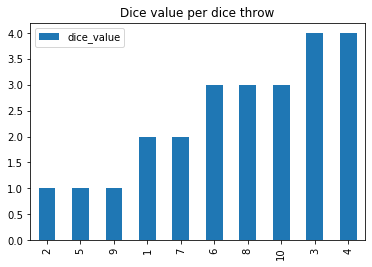

In [5]:
rolling_baby.sort_values(by='dice_value', inplace=True)

rolling_baby.plot(kind='bar')
plt.title('Dice value per dice throw')
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [6]:
roll_groupedby = rolling_baby.reset_index().groupby('dice_value').agg('count')
roll_groupedby

,index
dice_value,
1,3
2,2
3,3
4,2


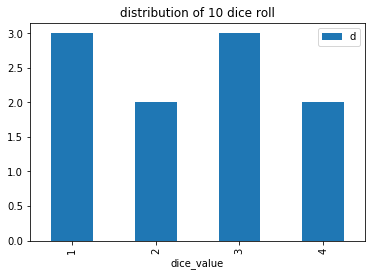

In [7]:
roll_groupedby.plot(kind='bar')
plt.legend('dice roll')
plt.title('distribution of 10 dice roll')
plt.show()

In [8]:
"""
The frequency distribution aggreates all singular bar plot from figure 1 into a grouped by value barplot
The frequency distribution simplify figure 1 plot by summing up all identical values
This way, it better illustrates the density distribution of each value
"""

'\nThe frequency distribution aggreates all singular bar plot from figure 1 into a grouped by value barplot\nThe frequency distribution simplify figure 1 plot by summing up all identical values\nThis way, it better illustrates the density distribution of each value\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [9]:
def mean_calculation(x):
    return sum(x)/len(x)

In [10]:
mean_calculation(rolling_baby['dice_value'])

2.4

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [55]:
# Method 1 - using dict comprehension
def freq_distribution(diceroll):
    freq = {x:diceroll.count(x) for x in diceroll}
    return freq

In [56]:
rolling = dice_roll()
freq_distribution(rolling)

{1: 2, 5: 2, 3: 2, 2: 2, 4: 2}

In [51]:
# Method 2 - using Pandas
freq = rolling_baby['dice_value'].value_counts()

freq

3    3
1    3
4    2
2    2
Name: dice_value, dtype: int64

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [12]:
def median_calculator(x):
    sorted_x = sorted(x)
    index = len(sorted_x)//2
    
    if len(sorted_x) %2:
        return sorted_x[index]
    else:
        return (sorted_x[index] + sorted_x[index+1]) //2

In [13]:
median_calculator(rolling_baby['dice_value'])

3

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [45]:
def first_quartile(x):
    return sorted(x)[int(len(x)*0.25)]

def second_quartile():
    return sorted(x)[int(len(x)*0.5)]   

def third_quartile():
    return sorted(x)[int(len(x)*0.75)]

In [46]:
first_quartile(rolling_baby['dice_value'])

1

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.

In [71]:
data = pd.read_csv(r'../data/roll_the_dice_hundred.csv', index_col=0)

display(data.shape)
data.head()

(100, 2)

,roll,value
0,0,1
1,1,2
2,2,6
3,3,1
4,4,6


#### 1.- Sort the values and plot them. What do you see?

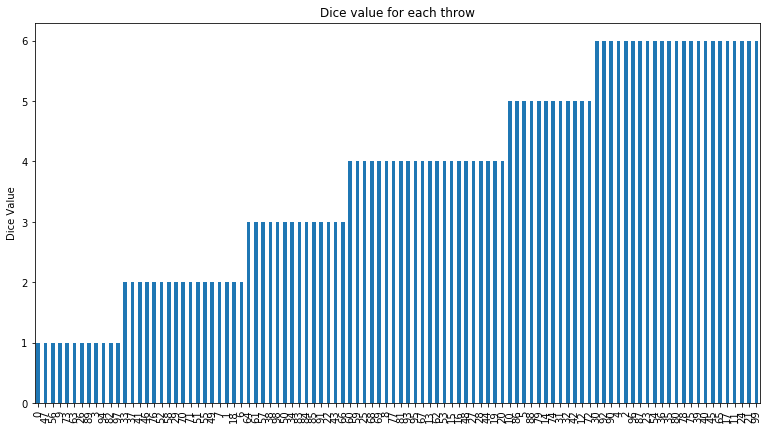

In [72]:
data.sort_values(by='value')['value'].plot(kind='bar', figsize=(13,7))
plt.ylabel('Dice Value')
plt.title('Dice value for each throw')
plt.show()

In [68]:
"""
Over a hundred dice roll, we start to have an overall equal frequency distribution.
Some values are more thrown than others, but one may assume that over enough dice roll, 
all 6 values would be equally distributed

whereas each roll has the same probability of being thrown,4 & 6 are here the most frequent values

That's because, over a very high number of rolls, the 6 values would balance out each other
but over 100 rolls, which is not that big of a sample, some values may randomly being more frequent
than others
"""

'\nOver a hundred dice roll, we start to have an overall equal frequency distribution.\nSome values are more thrown than others, but one may assume that over enough dice roll, \nall 6 values would be equally distributed\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [73]:
mean_calculation(data['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [ ]:
#using both methods

In [75]:
freq_distribution(list(data['value']))

{1: 12, 2: 17, 6: 23, 5: 12, 4: 22, 3: 14}

In [78]:
data['value'].value_counts()

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

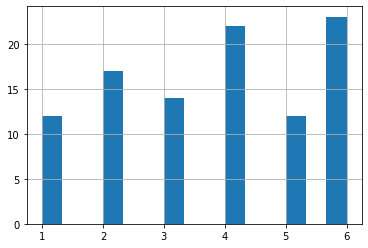

In [97]:
data['value'].hist(bins=15)

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [101]:
roll_the_dice_thousand = pd.read_csv(r'../data/roll_the_dice_thousand.csv', index_col=0)

display(roll_the_dice_thousand.shape)
roll_the_dice_thousand.head()

(1000, 2)

,roll,value
0,0,5
1,1,6
2,2,1
3,3,6
4,4,5


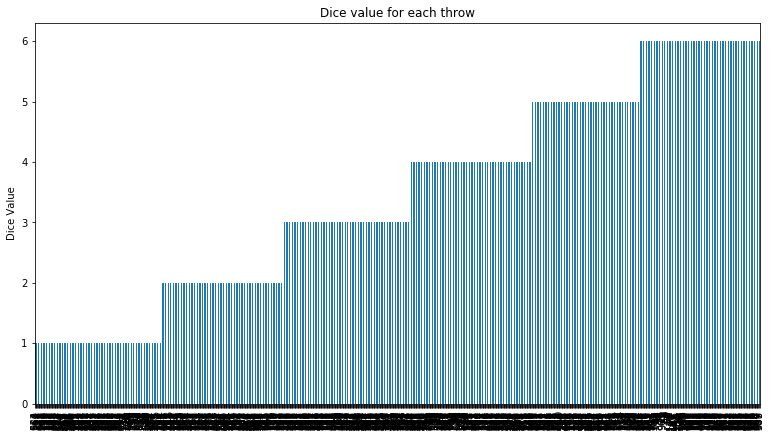

In [107]:
roll_the_dice_thousand.sort_values(by='value')['value'].plot(kind='bar', figsize=(13,7))
plt.ylabel('Dice Value')
plt.title('Dice value for each throw')
plt.show()

In [112]:
freq_distribution(list(roll_the_dice_thousand['value']))

{5: 149, 6: 166, 1: 175, 2: 167, 4: 168, 3: 175}

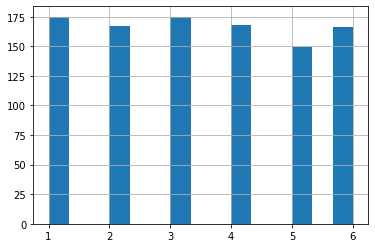

In [114]:
roll_the_dice_thousand['value'].hist(bins=15)

In [22]:
"""
With 1K dice roll, as assumed, the frequency distribution tends to equal frequency for each value
"""

'\nyour comments here\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [116]:
ages_population = pd.read_csv(r'../data/ages_population.csv')

display(ages_population.shape)
ages_population.head()

(1000, 1)

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


In [119]:
freq_distribution(list(ages_population['observation']))

{68.0: 3,
 12.0: 11,
 45.0: 29,
 38.0: 30,
 49.0: 19,
 27.0: 25,
 39.0: 45,
 42.0: 32,
 33.0: 22,
 30.0: 34,
 25.0: 19,
 44.0: 23,
 53.0: 12,
 46.0: 23,
 50.0: 16,
 22.0: 16,
 6.0: 2,
 29.0: 26,
 35.0: 33,
 28.0: 20,
 26.0: 23,
 60.0: 4,
 41.0: 36,
 52.0: 14,
 32.0: 30,
 23.0: 17,
 15.0: 8,
 40.0: 27,
 63.0: 7,
 31.0: 24,
 34.0: 29,
 61.0: 2,
 64.0: 2,
 37.0: 30,
 56.0: 15,
 14.0: 10,
 13.0: 6,
 51.0: 9,
 36.0: 31,
 18.0: 7,
 48.0: 19,
 58.0: 7,
 20.0: 13,
 54.0: 13,
 19.0: 11,
 62.0: 4,
 55.0: 13,
 21.0: 14,
 43.0: 32,
 17.0: 10,
 7.0: 1,
 47.0: 17,
 1.0: 2,
 16.0: 8,
 24.0: 18,
 59.0: 8,
 57.0: 7,
 8.0: 5,
 67.0: 4,
 2.0: 2,
 66.0: 3,
 4.0: 1,
 73.0: 1,
 82.0: 1,
 70.0: 1,
 5.0: 2,
 71.0: 1,
 9.0: 2,
 69.0: 1,
 11.0: 3,
 10.0: 3,
 65.0: 2}

Text(0.5, 1.0, 'Ages distribution of 1K persons in BCN - sample#1')

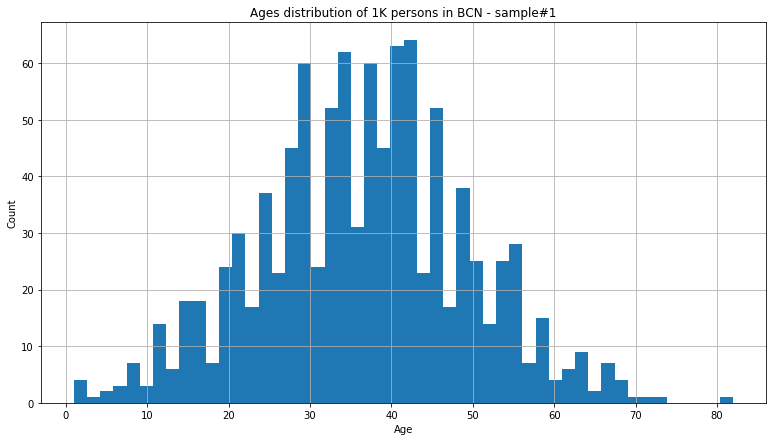

In [151]:
ages_population['observation'].hist(bins=50, figsize=(13,7))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Ages distribution of 1K persons in BCN - sample#1')

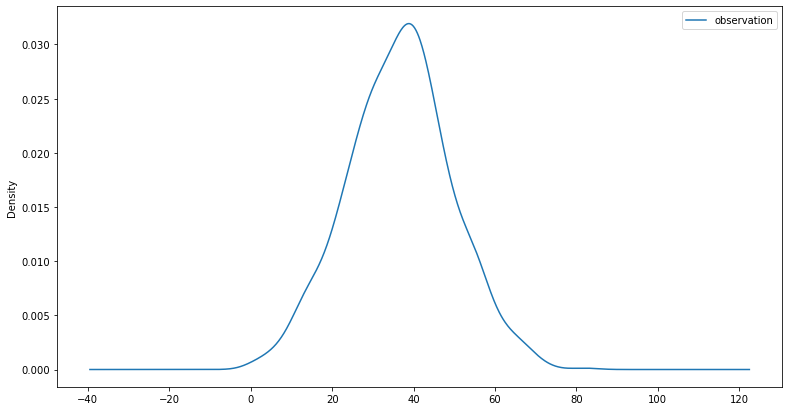

In [137]:
ages_population.plot.kde(figsize=(13,7))

Text(0.5, 1.0, 'Ages distribution of 1K persons in BCN')

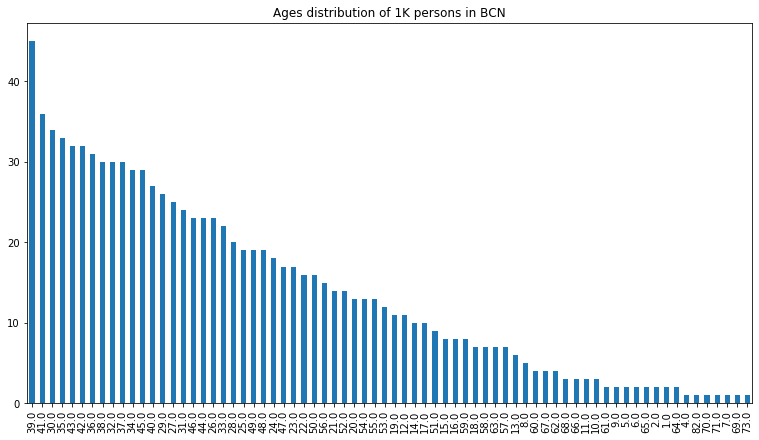

In [129]:
ages_population['observation'].value_counts().plot(kind='bar', figsize=(13,7))
plt.title('Ages distribution of 1K persons in BCN')

In [ ]:
"""
By looking at the plot, a Normal Distribution, the mean should be around 37-39
Looking like a Normal Distribution, the Standard Deviation should be around 15
"""

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [117]:
mean_calculation(ages_population['observation'])

36.56

In [128]:
ages_population['observation'].std()

12.81649962597677

In [139]:
print('mean:', ages_population.observation.mean())
print('std:', ages_population.observation.std())

mean: 36.56
std: 12.81649962597677


In [140]:
"""
My assumptions were close enough ;-)

Overall, plotting the distribution allows to have rather close approximation
of those values
"""

'\nMy assumptions were close enough ;-)\n\nOverall, plotting the distribution allows to have rather close approximation\nof those values\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [141]:
ages_population2 = pd.read_csv(r'../data/ages_population2.csv')

print(ages_population2.shape)
ages_population2.head()

(1000, 1)


,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


Text(0.5, 1.0, 'Ages distribution of 1K persons in BCN - sample#2')

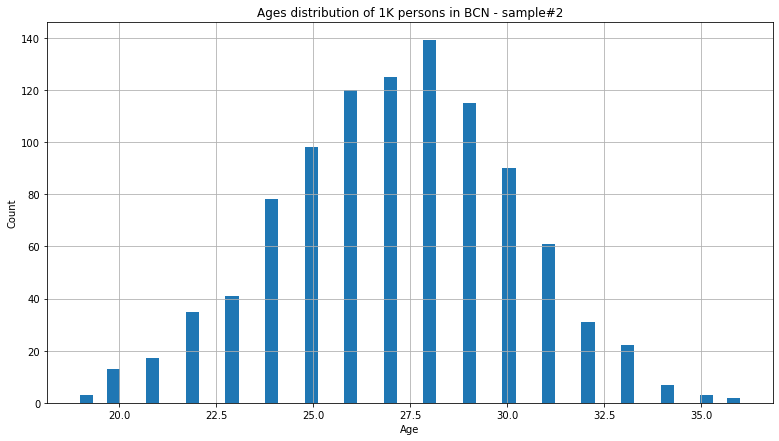

In [152]:
ages_population2['observation'].hist(bins=50, figsize=(13,7))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Ages distribution of 1K persons in BCN - sample#2')

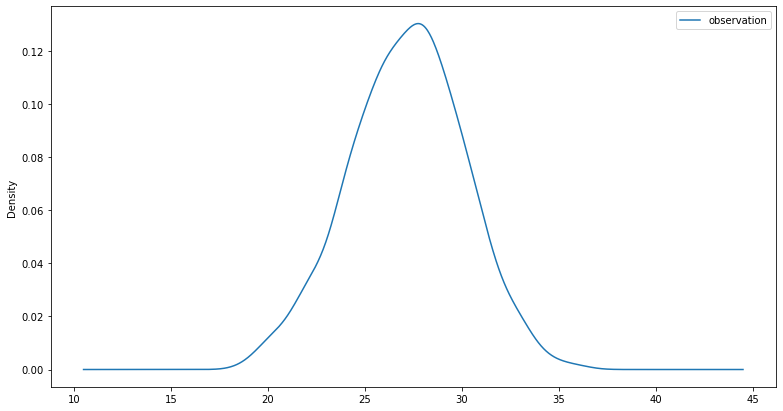

In [149]:
ages_population2.plot.kde(figsize=(13,7))

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [27]:
"""
This is a Poisson Distribution
"""

'\nyour comments here\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [168]:
ages_population2.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


In [155]:
"""
The mean is lower (27 years old) and the std way lower, which means the age of the population is much less spread out than
in the first sample
The population is this 2nd sample is therefore younger and with a narrower range of ages
"""

'\nThe mean is lower (27 years old) and the std way lower, which means the age of the population is much less spread out than\nin the first sample\nThe population is this 2nd sample is therefore younger and with a narrower range of ages\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [158]:
ages_population3 = pd.read_csv('../data/ages_population3.csv')

print(ages_population3.shape)

ages_population3.head()

(1000, 1)


,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


Text(0.5, 1.0, 'Ages distribution of 1K persons in BCN - sample#3')

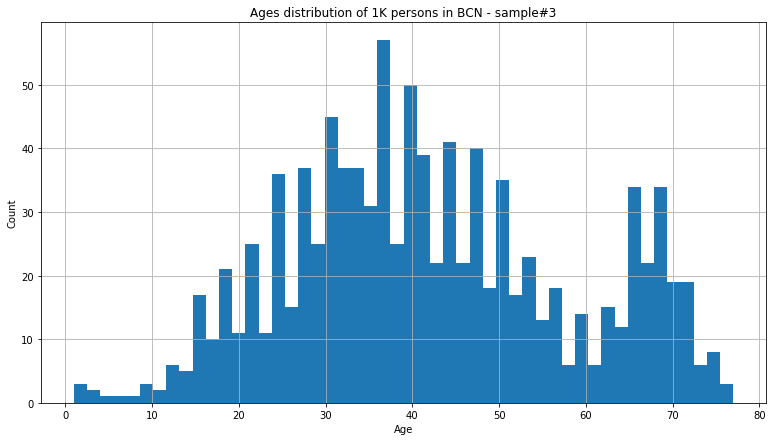

In [161]:
ages_population3.hist(bins=50, figsize=(13,7))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Ages distribution of 1K persons in BCN - sample#3')

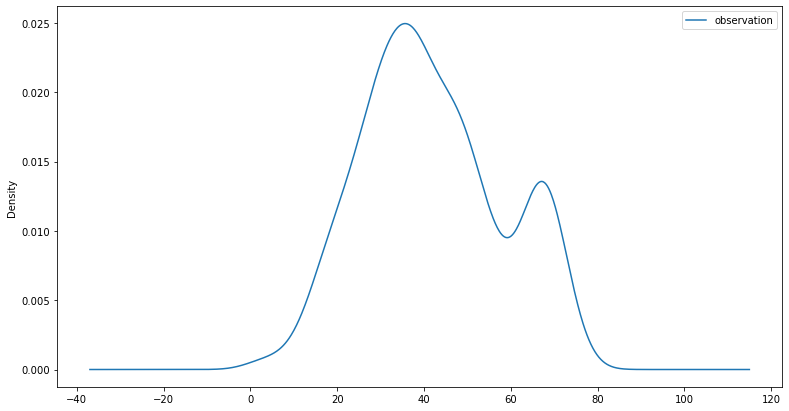

In [163]:
ages_population3.plot.kde(figsize=(13,7))

In [170]:
ages_population3.quantile(0.75)

observation    53.0
Name: 0.75, dtype: float64

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [164]:
ages_population3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [172]:
median_calculator(ages_population3['observation'])

40.0

In [34]:
"""
Data more spead out. cf. next answer below
"""

'\nyour comments here\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [173]:
display(ages_population3.quantile(0.75))

display(ages_population3.quantile(0.85))

observation    53.0
Name: 0.75, dtype: float64

observation    64.0
Name: 0.85, dtype: float64

In [32]:
"""
Here we do not have a Normal Distribution, due to the presence of a 2nd Normal, between 3rd & 4th quartile
First Normal around age of 35, and 2nd Normal centered around 67

75% of the data is below 53, which means the 1st Normal is the dominant one
2nd Normal encompasses less than 25% of the overall data, but creates skewness in the distribution

When we look at quantile 85%, at 64, we can assess that this 
second spike in the age distribution encompasses about 15% of the data
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [199]:
#Concatenating all 3 df into a general report, in order to call describe() on it to compare basic stats
general_report = pd.concat([ages_population['observation'], 
                           ages_population2['observation'], 
                           ages_population3['observation']],
                          axis=1,
                          keys=['sample1', 'sample2', 'sample3'])

In [201]:
general_report.describe()

,sample1,sample2,sample3
count,1000.0000,1000.000000,1000.000000
mean,36.5600,27.155000,41.989000
std,12.8165,2.969814,16.144706
min,1.0000,19.000000,1.000000
25%,28.0000,25.000000,30.000000
50%,37.0000,27.000000,40.000000
75%,45.0000,29.000000,53.000000
max,82.0000,36.000000,77.000000


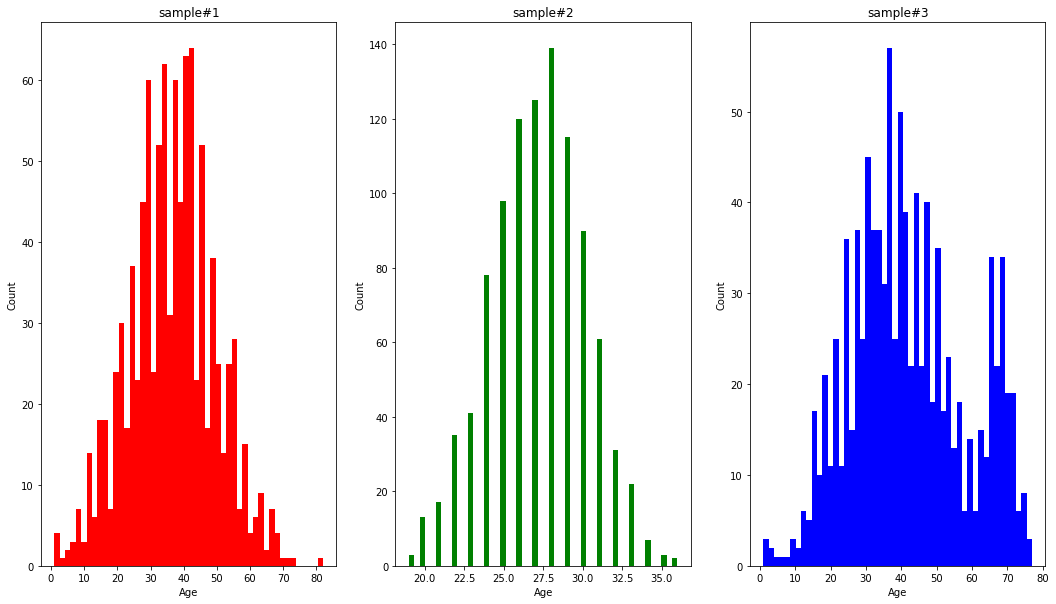

In [202]:
plt.figure(figsize=(18,10))
plt.subplot(1, 3, 1)  # 1st sample ages_population
plt.hist(ages_population['observation'],bins=50, color='r')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('sample#1')

plt.subplot(1, 3, 2)  # 2nd sample ages_population2
plt.hist(ages_population2['observation'],bins=50, color='g')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('sample#2')

plt.subplot(1, 3, 3)  # 3rd sample ages_population3
plt.hist(ages_population3['observation'],bins=50, color='b')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('sample#3')

plt.show()